# Text-to-Speech Singlish

Text to Melspectrogram using Tacotron2, FastSpeech2, GlowTTS and VITS, trained on Singapore National Speech Corpus, https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-singlish](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-singlish).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### Tacotron2 description

1. Malaya-speech Tacotron2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### FastSpeech2 description

1. Malaya-speech FastSpeech2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.
3. Cannot generate more than melspectrogram longer than 2000 timestamp, it will throw an error. Make sure the texts are not too long.

### GlowTTS description

1. Malaya-speech GlowTTS will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### VITS description

1. Malaya-speech VITS generate End-to-End, from text input into waveforms with 22050 sample rate.
2. No length limit, but to get better results, split the text.

### List available Tacotron2

In [3]:
malaya_speech.tts.available_tacotron2()

Size (MB) Quantized Size (MB) Understand punctuation  \
male                  104                26.3                   True   
female                104                26.3                   True   
husein                104                26.3                   True   
haqkiem               104                26.3                   True   
female-singlish       104                26.3                   True   
yasmin                104                26.3                   True   
osman                 104                26.3                   True   

                Is lowercase  
male                    True  
female                  True  
husein                  True  
haqkiem                 True  
female-singlish         True  
yasmin                 False  
osman                  False

### List available FastSpeech2

In [4]:
malaya_speech.tts.available_fastspeech2()

Size (MB) Quantized Size (MB) Understand punctuation  \
male                  125                31.7                   True   
female                125                31.7                   True   
husein                125                31.7                   True   
haqkiem               125                31.7                   True   
female-singlish       125                31.7                   True   
osman                 125                31.7                   True   
yasmin                125                31.7                   True   
yasmin-sdp            128                33.1                   True   
osman-sdp             128                33.1                   True   

                Is lowercase  
male                    True  
female                  True  
husein                  True  
haqkiem                 True  
female-singlish         True  
osman                  False  
yasmin                 False  
yasmin-sdp             False  
osman-sdp              False

### List available GlowTTS

In [5]:
malaya_speech.tts.available_glowtts()

Size (MB) Quantized Size (MB) Understand punctuation  \
male                  119                27.6                   True   
female                119                27.6                   True   
haqkiem               119                27.6                   True   
female-singlish       119                27.6                   True   
yasmin                119                27.6                   True   
osman                 119                27.6                   True   
multispeaker          404                79.9                   True   

                Is lowercase  
male                    True  
female                  True  
haqkiem                 True  
female-singlish         True  
yasmin                 False  
osman                  False  
multispeaker            True

### List available VITS

In [6]:
malaya_speech.tts.available_vits()

Size (MB) Understand punctuation Is lowercase
mesolitica/VITS-osman                 145                   True        False
mesolitica/VITS-yasmin                145                   True        False
mesolitica/VITS-female-singlish       145                   True         True
mesolitica/VITS-haqkiem               145                   True         True

### Load Tacotron2 model

Read more about Tacotron2 model at https://malaya-speech.readthedocs.io/en/latest/tts-tacotron2-model.html

In [7]:
tacotron = malaya_speech.tts.tacotron2(model = 'female-singlish')
quantized_tacotron = malaya_speech.tts.tacotron2(model = 'female-singlish', quantized = True)

/home/ubuntu/.local/lib/python3.8/site-packages/malaya/tokenizer.py:202: FutureWarning: Possible nested set at position 3361
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/ubuntu/.local/lib/python3.8/site-packages/malaya/tokenizer.py:202: FutureWarning: Possible nested set at position 3879
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
2022-09-06 13:52:17.635909: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-06 13:52:17.662842: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-06 13:52:17.662861: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic info

### Load FastSpeech2 model

Read more about FastSpeech2 model at https://malaya-speech.readthedocs.io/en/latest/tts-fastspeech2-model.html

In [8]:
fastspeech = malaya_speech.tts.fastspeech2(model = 'female-singlish')
quantized_fastspeech = malaya_speech.tts.fastspeech2(model = 'female-singlish', quantized = True)

Load quantized model will cause accuracy drop.


### Load GlowTTS model

Read more about GlowTTS model at https://malaya-speech.readthedocs.io/en/latest/tts-glowtts-model.html

In [9]:
glowtts = malaya_speech.tts.glowtts(model = 'female-singlish')
quantized_glowtts = malaya_speech.tts.glowtts(model = 'female-singlish', quantized = True)

Load quantized model will cause accuracy drop.


### Load VITS model

Read more about VITS model at https://malaya-speech.readthedocs.io/en/latest/tts-vits-model.html

In [23]:
vits = malaya_speech.tts.vits(model = 'mesolitica/VITS-female-singlish')

### Predict Tacotron2

```python
def predict(self, string):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Dict[string, decoder-output, mel-output, universal-output, alignment]
    """
```

It only able to predict 1 text for single feed-forward.

In [11]:
string1 = 'PETALING JAYA: Former prime minister Najib Razak has criticised the Inland Revenue Board’s (LHDN) move to serve him a bankruptcy notice, which his legal team had earlier called a political ploy.'

In [12]:
%%time

r = tacotron.predict(string1)

CPU times: user 3.62 s, sys: 436 ms, total: 4.06 s
Wall time: 4.64 s


In [13]:
%%time

quantized_r = quantized_tacotron.predict(string1)

CPU times: user 4.01 s, sys: 201 ms, total: 4.21 s
Wall time: 3.73 s


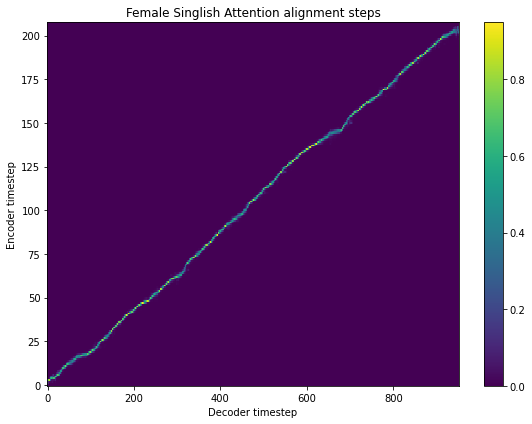

In [14]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    r['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

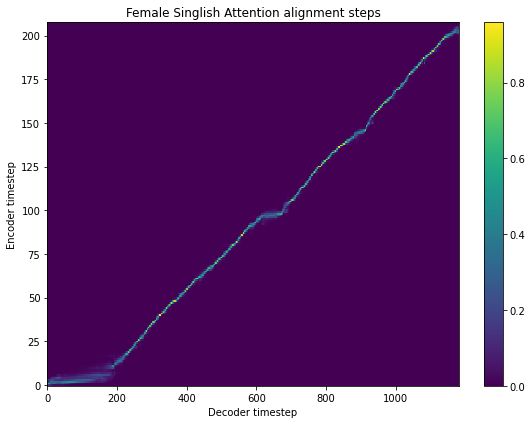

In [15]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    quantized_r['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

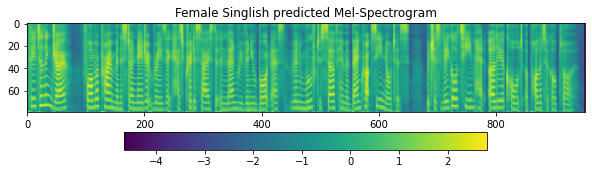

In [16]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

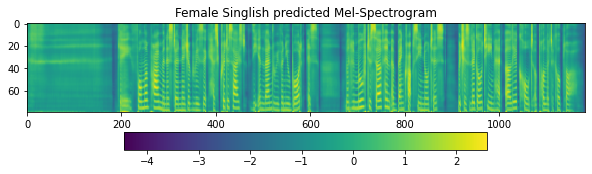

In [17]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(quantized_r['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Predict FastSpeech2

```python
def predict(
    self,
    string,
    speed_ratio: float = 1.0,
    f0_ratio: float = 1.0,
    energy_ratio: float = 1.0,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    speed_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.
    f0_ratio: float, optional (default=1.0)
        Increase this variable will increase frequency, low frequency will generate more deeper voice.
    energy_ratio: float, optional (default=1.0)
        Increase this variable will increase loudness.

    Returns
    -------
    result: Dict[string, decoder-output, universal-output, mel-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [18]:
%%time

r_fastspeech = fastspeech.predict(string1)

CPU times: user 1.86 s, sys: 228 ms, total: 2.08 s
Wall time: 1.49 s


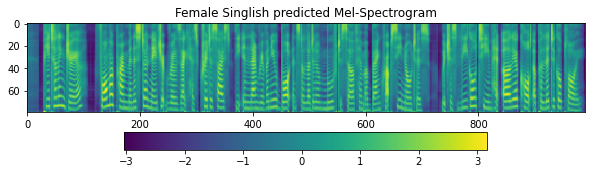

In [19]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_fastspeech['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Predict GlowTTS

```python
def predict(
    self,
    string,
    temperature: float = 0.3333,
    length_ratio: float = 1.0,
    **kwargs,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    temperature: float, optional (default=0.3333)
        Decoder model trying to decode with encoder(text) + random.normal() * temperature.
    length_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.

    Returns
    -------
    result: Dict[string, ids, mel-output, alignment, universal-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [20]:
%%time

r_glowtts = glowtts.predict(string1)

CPU times: user 2.45 s, sys: 185 ms, total: 2.63 s
Wall time: 2.48 s


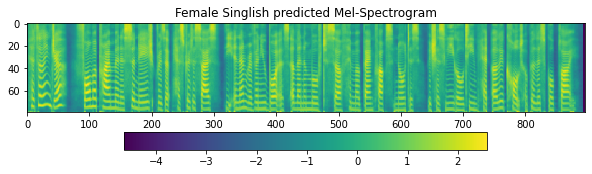

In [21]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_glowtts['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Predict VITS

```python
def predict(
    self,
    string,
    temperature: float = 0.6666,
    temperature_durator: float = 0.6666,
    length_ratio: float = 1.0,
    **kwargs,
):
    """
    Change string to waveform.

    Parameters
    ----------
    string: str
    temperature: float, optional (default=0.6666)
        Decoder model trying to decode with encoder(text) + random.normal() * temperature.
    temperature_durator: float, optional (default=0.6666)
        Durator trying to predict alignment with random.normal() * temperature_durator.
    length_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.

    Returns
    -------
    result: Dict[string, ids, alignment, y]
    """
```

It only able to predict 1 text for single feed-forward.

In [22]:
%%time

r_vits = vits.predict(string1)

CPU times: user 12.2 s, sys: 2.33 s, total: 14.5 s
Wall time: 3.19 s


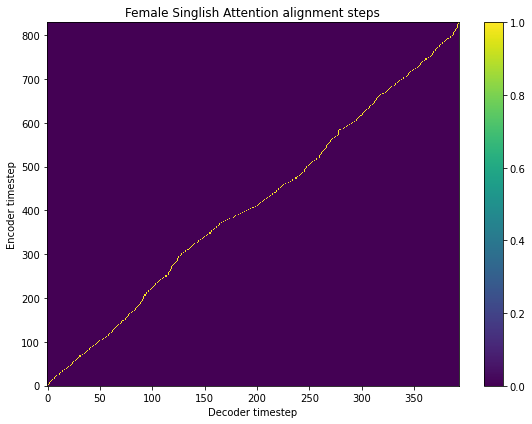

In [32]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    r_vits['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

### Load Vocoder model

There is only 1 way to synthesize melspectrogram output from Singlish TTS models,

1. If you are going to use universal MelGAN, use `universal-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-universal-melgan.html

In [33]:
vocoder = malaya_speech.vocoder.melgan(model = 'universal-1024')

In [34]:
y_ = vocoder(r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [35]:
y_ = vocoder(quantized_r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [36]:
y_ = vocoder(r_fastspeech['universal-output'])
ipd.Audio(y_, rate = 22050)

In [37]:
y_ = vocoder(r_glowtts['universal-output'])
ipd.Audio(y_, rate = 22050)

In [38]:
ipd.Audio(r_vits['y'], rate = 22050)

### Predict Bahasa text

In [39]:
string = 'husein zolkepli sangatlah comel, ketiak wangi dan mempunyai baby yang comel. Husein juga suka mandi pada waktu pagi dan petang sambil menggunakan sabun lifeboy.'

In [40]:
%%time

r = tacotron.predict(string)

CPU times: user 3.28 s, sys: 56.1 ms, total: 3.34 s
Wall time: 2.69 s


In [41]:
%%time

quantized_r = quantized_tacotron.predict(string)

CPU times: user 3.35 s, sys: 83.8 ms, total: 3.44 s
Wall time: 2.76 s


In [42]:
%%time

r_fastspeech = fastspeech.predict(string)

CPU times: user 829 ms, sys: 5.46 ms, total: 835 ms
Wall time: 74.9 ms


In [43]:
%%time

r_vits = vits.predict(string)

CPU times: user 10.3 s, sys: 34 ms, total: 10.4 s
Wall time: 1.35 s


In [44]:
y_ = vocoder(r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [45]:
y_ = vocoder(quantized_r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [46]:
y_ = vocoder(r_fastspeech['universal-output'])
ipd.Audio(y_, rate = 22050)

In [47]:
ipd.Audio(r_vits['y'], rate = 22050)